# Lab 9 - Gale-Shapley and Irving Algorithms
Sebastian Molina - smolinad@unal.edu.co

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from copy import copy
import random
import matplotlib.pyplot as plt
import math
from IPython.display import display, Latex, Markdown

In [ ]:
#Using https://towardsdatascience.com/gale-shapley-algorithm-simply-explained-caa344e643c2

def gale(man_list, women_list, man_df, women_df):
    women_available = {man:women_list for man in man_list}
    # waiting list of men that were able to create pair on each iteration
    waiting_list = []
    # dict to store created pairs
    proposals = {}
    # variable to count number of iterations
    count = 0
    
    # while not all men have pairs
    while len(waiting_list)<len(man_list):
        # man makes proposals
        for man in man_list:
            if man not in waiting_list:
                # each man make proposal to the top women from it's list
                women = women_available[man]
                best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
                proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                    women_df.loc[man][best_choice])
        # if women have more than one proposals 
        # she will choose the best option
        overlays = Counter([key[1] for key in proposals.keys()])
        # cycle to choose the best options
        for women in overlays.keys():
            if overlays[women]>1:
                # pairs to drop from proposals
                pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                        if women in pair}.items(), 
                    key=lambda x: x[1][1]
                    )[1:]
                # if man was rejected by woman
                # there is no pint for him to make proposal 
                # second time to the same woman
                for p_to_drop in pairs_to_drop:
                    del proposals[p_to_drop[0]]
                    _women = copy(women_available[p_to_drop[0][0]])
                    _women.remove(p_to_drop[0][1])
                    women_available[p_to_drop[0][0]] = _women
        # man who successfully created pairs must be added to the waiting list 
        waiting_list = [man[0] for man in proposals.keys()]
        # update counter
        count+=1
    
    return count, proposals;

#1.
Find the best and worst cases for the Gale-Shapley and Irving ([An Efficient Algorithm for the “Stable Roommates” Problem](http://www.dcs.gla.ac.uk/~pat/jchoco/roommates/papers/Comp_sdarticle.pdf)) Algorithms, and run in Colab these algorithms for those cases for $n=4$ and $40$.
- Gale–Shapley algorithm simply explained – [towardsdatascience](https://towardsdatascience.com/gale-shapley-algorithm-simply-explained-caa344e643c2)
- Stable Marriage Problem – [geeksforgeeks](https://www.geeksforgeeks.org/stable-marriage-problem/)
- Stable matching, as a game – [towardsdatascience](https://towardsdatascience.com/stable-matching-as-a-game-a68c279d70b)

- For $n=4$, best case scenario:

In [ ]:
man_list = ['a', 'b', 'c', 'd']
women_list = ['A', 'B', 'C', 'D']

women_df = pd.DataFrame({'A': [1,2,3,4], 'B': [2,3,4,1], 'C':[3,4,1,2], 'D':[4,1,2,3]})
women_df.index = man_list

man_df = pd.DataFrame({'A': [1,2,3,4], 'B': [2,3,4,1], 'C':[3,4,1,2], 'D':[4,1,2,3]})
man_df.index = man_list

count, proposals = gale(man_list, women_list, man_df, women_df)

In [ ]:
count

1

In [ ]:
proposals

{('a', 'A'): (1, 1),
 ('b', 'D'): (1, 1),
 ('c', 'C'): (1, 1),
 ('d', 'B'): (1, 1)}

- For $n=4$, worst case scenario:

In [ ]:
man_list = ['a', 'b', 'c', 'd']
women_list = ['A', 'B', 'C', 'D']

women_df = pd.DataFrame({'A': [3,4,2,1], 'B': [3,1,4,2], 'C':[2,3,4,1], 'D':[3,2,1,4]})
women_df.index = man_list

man_df = pd.DataFrame({'A': [1,2,3,4], 'B': [2,3,4,1], 'C':[3,4,1,2], 'D':[4,2,3,4]})
man_df.index = man_list

count, proposals = gale(man_list, women_list, man_df, women_df)

In [ ]:
count

4

- For $n=40$, best case scenario:

In [ ]:
from collections import deque

man_list = list(range(1, 41))
women_list = list(range(41, 81))

man_dict = dict((men, []) for men in man_list)
women_dict = dict((women, []) for women in women_list)

pm = deque(list(range(1, 41)))
pm.rotate(1)

pw = deque(list(range(1, 41)))
pw.rotate(1)

for k, v in man_dict.items():
    pm.rotate(-1)
    p = list(pm)
    man_dict[k] = p

for l, s in women_dict.items():
    pw.rotate(-1)
    p1 = list(pw)
    women_dict[l] = p1

man_df = pd.DataFrame(men_dict, index=man_list)
women_df = pd.DataFrame(women_dict, index=man_list)

count, proposals = gale(man_list=man_list, women_list=women_list, man_df=man_df, women_df=women_df)

In [ ]:
count

1

In [ ]:
proposals

{(1, 41): (1, 1),
 (2, 80): (1, 1),
 (3, 79): (1, 1),
 (4, 78): (1, 1),
 (5, 77): (1, 1),
 (6, 76): (1, 1),
 (7, 75): (1, 1),
 (8, 74): (1, 1),
 (9, 73): (1, 1),
 (10, 72): (1, 1),
 (11, 71): (1, 1),
 (12, 70): (1, 1),
 (13, 69): (1, 1),
 (14, 68): (1, 1),
 (15, 67): (1, 1),
 (16, 66): (1, 1),
 (17, 65): (1, 1),
 (18, 64): (1, 1),
 (19, 63): (1, 1),
 (20, 62): (1, 1),
 (21, 61): (1, 1),
 (22, 60): (1, 1),
 (23, 59): (1, 1),
 (24, 58): (1, 1),
 (25, 57): (1, 1),
 (26, 56): (1, 1),
 (27, 55): (1, 1),
 (28, 54): (1, 1),
 (29, 53): (1, 1),
 (30, 52): (1, 1),
 (31, 51): (1, 1),
 (32, 50): (1, 1),
 (33, 49): (1, 1),
 (34, 48): (1, 1),
 (35, 47): (1, 1),
 (36, 46): (1, 1),
 (37, 45): (1, 1),
 (38, 44): (1, 1),
 (39, 43): (1, 1),
 (40, 42): (1, 1)}

- For $n=40$, worst case scenario:

#2.
Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for $n=4$ and $40$. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

- For $n=4$:

Minimum iterations required: 1

Maximum iterations required: 7

Average iterations required: 2.69

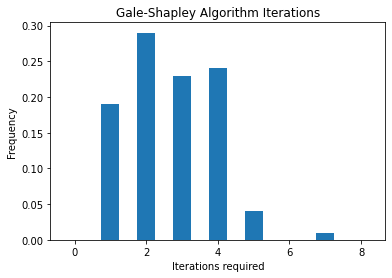

In [ ]:
man_list = ['a', 'b', 'c', 'd']
women_list = ['A', 'B', 'C', 'D']
iterations = []

for i in range(100):
    men_dict = dict((men, []) for men in women_list)
    women_dict = dict((women, []) for women in women_list)

    for k, v in men_dict.items():
        preference = list(range(1, 5))
        random.shuffle(preference)
        men_dict[k] = preference

    for l,s in women_dict.items():
        preference1 = list(range(1, 5))
        random.shuffle(preference1)
        women_dict[l] = preference1

    man_df = pd.DataFrame(men_dict, index=man_list)
    women_df = pd.DataFrame(women_dict, index=man_list)

    c, p = gale(man_list=man_list, women_list=women_list, man_df=man_df, women_df=women_df)
    iterations.append(c)

plt.hist(iterations, bins=np.arange(0,10)-0.5, rwidth=0.5, density=True)
plt.xlabel("Iterations required")
plt.ylabel("Frequency");
plt.title("Gale-Shapley Algorithm Iterations")

min_it = min(iterations)
max_it = max(iterations)
avg_it = np.average(iterations)

display(Markdown('Minimum iterations required: ' + str(min_it)))
display(Markdown('Maximum iterations required: ' + str(max_it)))
display(Markdown('Average iterations required: ' + str(avg_it)))

- For $n=40$:

Minimum iterations required: 6

Maximum iterations required: 110

Average iterations required: 35.2

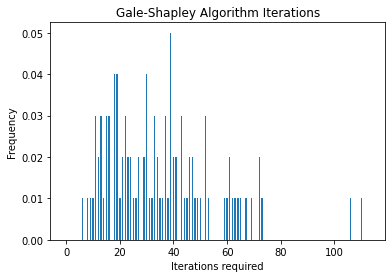

In [ ]:
man_list = list(range(1, 41))
women_list = list(range(41, 81))
iterations = []

for i in range(100):
    men_dict = dict((men, []) for men in women_list)
    women_dict = dict((women, []) for women in women_list)

    for k, v in men_dict.items():
        preference = list(range(1, 41))
        random.shuffle(preference)
        men_dict[k] = preference

    for l,s in women_dict.items():
        preference1 = list(range(1, 41))
        random.shuffle(preference1)
        women_dict[l] = preference1

    man_df = pd.DataFrame(men_dict, index=man_list)
    women_df = pd.DataFrame(women_dict, index=man_list)

    c, p = gale(man_list=man_list, women_list=women_list, man_df=man_df, women_df=women_df)
    iterations.append(c)
    

min_it = min(iterations)
max_it = max(iterations)
avg_it = np.average(iterations)

plt.hist(iterations, bins=np.arange(0, max_it+5)-0.5, rwidth=0.5, density=True)
plt.xlabel("Iterations required")
plt.ylabel("Frequency");
plt.title("Gale-Shapley Algorithm Iterations")

display(Markdown('Minimum iterations required: ' + str(min_it)))
display(Markdown('Maximum iterations required: ' + str(max_it)))
display(Markdown('Average iterations required: ' + str(avg_it)))